# Using Vault to Better Protect Your Secrets.

Presented by Bryce Verdier

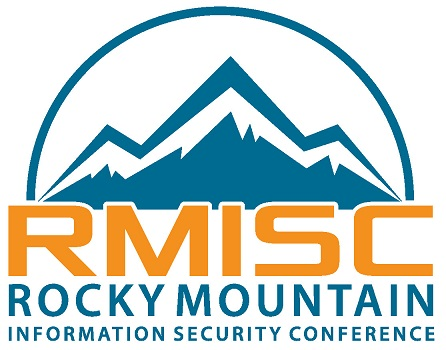

## Agenda:

- Who am I?
- A Quick Moment for Clarity
- What's the problem and why you should care?
- Introduce Hashicorp Vault
    - Review some concepts
- The *Fun* part -- Demo:
    - Upload & Retrieve Secrets from the server
    - Create Policy to better protect secrets
    - Review some `bad` code
    - Modify the old code to use the token
    - ...
- Profit!


## Who is this guy?

![me](images/me.jpeg)

- Avid reader
- Krav Maga practioner
- Motorcycle rider
- Video game player


I am the human in this picture. My cat, Eve, is using the laptop as a butt warmer and giving me the look of disdain that comes when she knows that I should be writing better code.

## Why I'm Worth Listening To

![DevSecOps](images/Dev-Software-releases-1.png)

- Past Roles in my 20 year tech career:
    - (Infrastructure) Information Security Engineer
        - CISSP, CEH
    - Systems Engineer/Systems Administrator
    - Python Programmer
        - Technical Review for Wesley Chun's Core Python Applications
    - Consulting

Why:

These roles are imporant for this talk. My time spent as both a Sysadmin & programmer allows me to speak with confidence about the problem and my time as an information security engineer helped me realize both what could happen & implementing a possible solution.

## A Quick Moment for Clarity

What do I mean when I say `Secrets`?

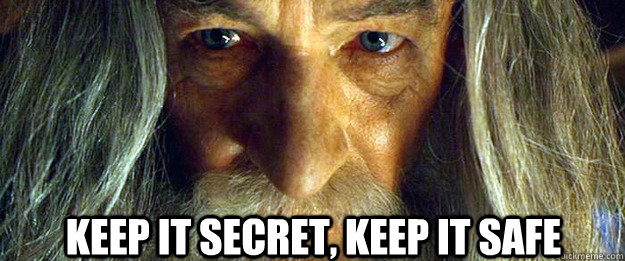

## Why Are We Here?

![socrates](images/screen_shot.png)

![priv_key](images/priv_key.png)

![deadpool](images/deadpoolnonloop.gif)

<cite>https://giphy.com/gifs/foxhomeent-yvBAuESRTsETqNFlEl</cite>

Its amazing what you can find on Github if you're willing to look hard enough.

Lets be honest with ourselves. Who here might have maybe, acutally, sort of wrote or committed code that had a simiar problem as this? Raise your hand.

At a previous role, we had a security incident that was very similar to this. A programmer accidently uploaded code from the private cloud github repo, to his own public repo. The uploaded code included secrets withinthe code base. For various reasons I can't go into all the details, however I can say that migrating to Vault was part of making sure this problem never happened again.

How does this happen?

- `Everyone is responsible for security`.


-    * Not everyone is accountable for security.

-    * Security is not always everyone's highest priority. Short cuts are made in the pursuit of getting features and fixes released sooner.

# Introducing Hashicorp's Vault

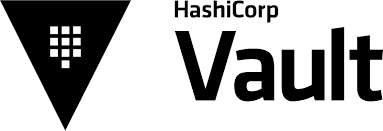

## Disclaimer #1

I'm not affiliated nor being sponsored by Hashicorp for this presentation. I'm doing this because I think that this application is a *good* idea and more people/companies should start using it.

## Corporate Speak

"Secure, store and tightly control access to tokens, passwords, certificates, encryption keys for protecting secrets and other sensitive data using a UI, CLI, or HTTP API."

## How I Like to Think About It

Password Manager  | + | Configuration Manager
--- | :---: | ---
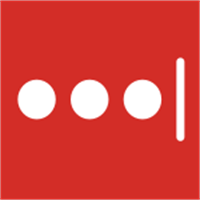 | + | 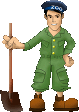

## Quick Review of Password Managers

> A password manager is a computer program, web browser add-on, or website that allows you to store and organize the passwords for your accounts on various websites. 
> -- <cite>https://techboomers.com/t/what-is-password-manager#</cite>

## How Password Managers and Vault are Similar

- Requires the use of a master password to unlock/unseal the passwords/secrets inside.

- Encypts file contents by default

## Quick Review of Configuration Managers

> ZooKeeper is a centralized service for maintaining configuration information, naming, providing distributed synchronization, and providing group services.
> -- <cite>https://zookeeper.apache.org/</cite>

## Zookeeper Architecture Overview

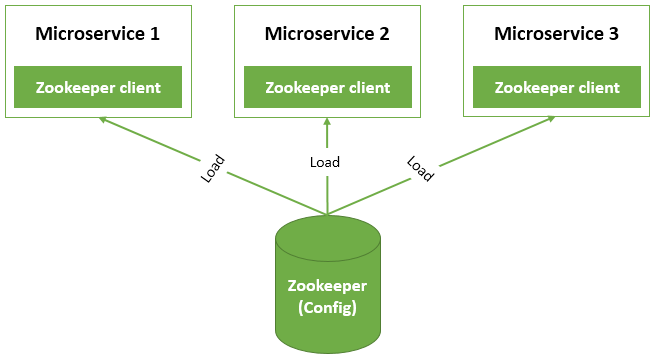

<cite>https://www.stackextend.com/zookeeper/centralized-configuration-with-apache-zookeeper/</cite>

## Zookeeper Tree Structure

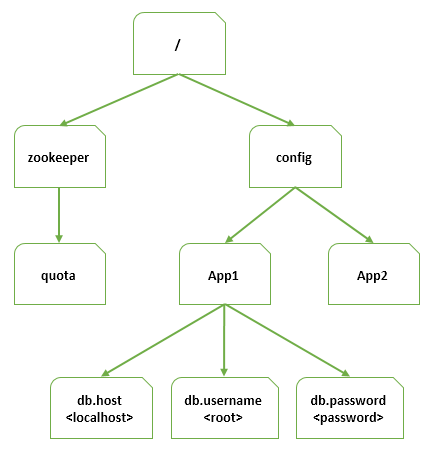

<cite>https://www.stackextend.com/zookeeper/centralized-configuration-with-apache-zookeeper/</cite>

## Example of Using Kazoo Library for Getting Data from Zookeeper

```python
from kazoo.client import KazooClient

zk = KazooClient(hosts='127.0.0.1:2181', read_only=True)
zk.start()

data, stat = zk.get("/config/App1/db.host")
print("Version: %s, data: %s" % (stat.version, data.decode("utf-8")))
```

"localhost" would be the result of this request

## How Configuartion Managers and Vault are Similar

- Provides an API for retreiving information

- Stores information in a `Unix` Tree structure

## Disclamer #2 - Before the demo

When running in production, you *REALLY* should run Vault with:

- TLS/SSL certificate

- System Hardening & Monitoring

- A plan to securely save and distribute the five (5) unsealing keys

- Deleting (recommended by Hashicorp) or properly saving the root token

## Demo Time

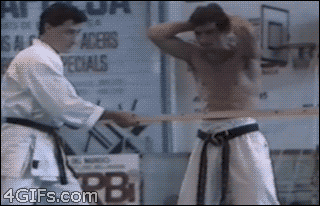

## Review of Bad Code :(

```python
#!/usr/bin/env python                                                                                   
                                                                                                        
HOST = "localhost"                                                                                      
PASSWORD = "password"                                                                                   
USERNAME = "root"                                                                                       
                                                                                                        
OUTPUT ="""                                                                                             
This is just an example, but I'm sure you've seen it before.                                            
HOST : {0},                                                                                             
PASSWORD: {1},                                                                                          
USER: {2}"""                                                                                            
                                                                                                        
print(OUTPUT.format(HOST,PASSWORD,USERNAME))
```

## Review of Good code :)

```python
#!/usr/bin/env python                                                                                   
                                                                                                        
from hvac import Client                                                                                 
from sys import argv                                                                                    
                                                                                                        
client = Client(                                                                                        
    url='http://localhost:8200',                                                                        
    token=argv[1]                                                                                       
)                                                                                                       
                                                                                                        
data = client.secrets.kv.read_secret_version(path='App1')['data']                                       
                                                                                                        
OUTPUT ="""                                                                                             
This is just a better example.                                                                          
HOST : {0},                                                                                             
PASSWORD: {1},                                                                                          
USER: {2}"""                                                                                            
                                                                                                        
print(                                                                                                  
    OUTPUT.format(                                                                                      
        data['data']['db.host'],                                                                        
        data['data']['db.password'],                                                                    
        data['data']['db.username']                                                                     
    )                                                                                                   
)
```

## This isn't everything that Vault can do

This presentation is just a taste of the things that Vault can do:

- Some of the other things are:

- Github access tokens

- MySQL/Postgres users

- EC2/IAM tokens

- Generate Github tokens
- Create mysql/postgres users. The users can be temporary, as is for a limitied period of time. As well as locked into having cretain views.
- Manage ec2/iam tokens
- Finally
- provide these token like services for SSH keys

## Agenda - Review:

- Who am I?
- What's the problem and why you should care?
- Introduce Hashicorp Vault
- The *Fun* part -- Demo
- Profit!

## Profit!

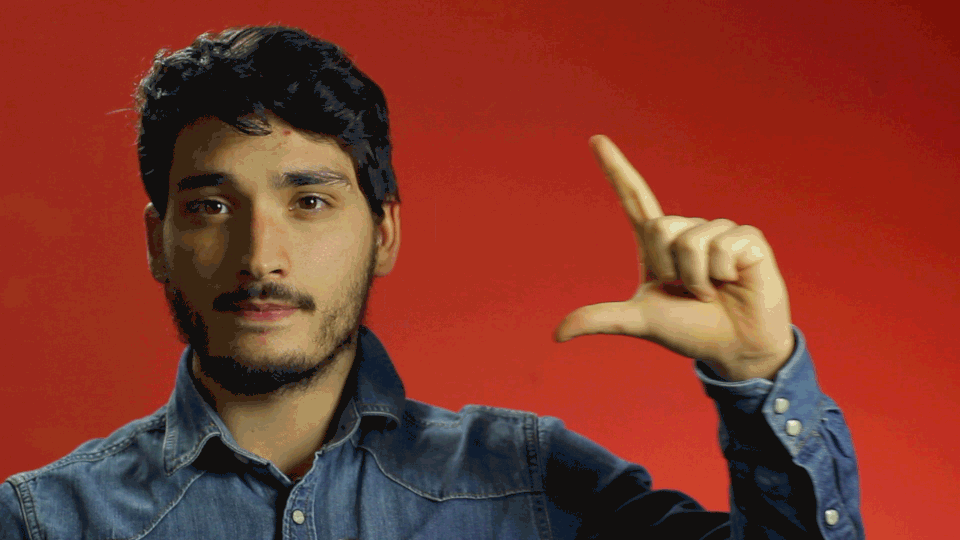

## How to Contact Me

* Personal Email: bryceverdier@protonmail.com
* Github: btv
* Slides: https://github.com/btv/vault_presentation

Time is precious. Thank you for sharing yours with me this morning.